In [5]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [6]:
data = {
    'Node': ['1', '2', '3', '4', '5'],
    'E2TermStart(s)': [2.549, 2.921, 2.564, 4.020, 2.615],
    'E2TermStart_Std_Dev': [0.106, 0.545, 0.106, 0.575, 0.175],
    'xAppStart(s)': [2.438, 2.889, 2.585, 3.602, 2.320],
    'xAppStart_Std_Dev': [0.4503, 0.3991, 0.3643, 0.2344, 0.1894],
    'xAppRegister(s)': [8.078, 8.700, 8.262, 9.306, 8.399],
    'xAppRegister_Std_Dev': [0.0451, 0.0021, 0.0127, 0.0318, 0.0571]
}

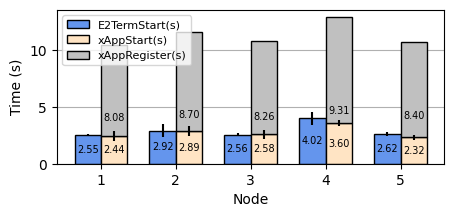

In [14]:
# Set up the bar graph
nodes = data['Node']
e2term_start = data['E2TermStart(s)']
e2term_start_std = data['E2TermStart_Std_Dev']
xapp_start = data['xAppStart(s)']
xapp_start_std = data['xAppStart_Std_Dev']
xapp_register = data['xAppRegister(s)']
xapp_register_std = data['xAppRegister_Std_Dev']

bar_width = 0.35
opacity = 1
ind = np.arange(len(nodes))

# Set up the figure and axis for the graph
fig, ax = plt.subplots(figsize=(5, 2))

# Create the grouped bar graph
bar1 = ax.bar(ind - bar_width / 2, e2term_start, bar_width, yerr=e2term_start_std, alpha=opacity, edgecolor='black', color='#6495ED', label='E2TermStart(s)')
bar2 = ax.bar(ind + bar_width / 2, xapp_start, bar_width, yerr=xapp_start_std, alpha=opacity, edgecolor='black',color='#FFE4C4', label='xAppStart(s)')
bar3 = ax.bar(ind + bar_width / 2, xapp_register, bar_width, yerr=xapp_register_std, alpha=opacity, edgecolor='black',color='#C0C0C0', label='xAppRegister(s)', bottom=xapp_start)

# Set labels and title
ax.set_xlabel('Node')
ax.set_ylabel('Time (s)')
ax.set_xticks(ind)
ax.set_xticklabels(nodes)
ax.legend(loc='upper left')
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_axisbelow(True)
# Add values on top of each bar
# Add values in the center of each bar
for bars, std_devs in [(bar1, e2term_start_std), (bar2, xapp_start_std), (bar3, xapp_register_std)]:
    for rect, std_dev in zip(bars, std_devs):
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height / 2),
                    xytext=(0, 0),  # No vertical offset
                    textcoords="offset points",
                    ha='center', va='center', fontsize=7)
                    #bbox=dict(boxstyle="round,pad=0.2", edgecolor="black", facecolor="white"))

ax.legend(loc='upper left', fontsize=8)
# Show the plot
plt.savefig('out/RIC-Ctrl-Loop-Initialization-Times.pdf', bbox_inches='tight')
plt.savefig('out/RIC-Ctrl-Loop-Initialization-Times.png', dpi=300, bbox_inches='tight')
plt.show()